<a href="https://colab.research.google.com/github/rezaldii/Analyzing-Wikipedia-Pages/blob/main/Analyzing_Wikipedia_Pages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Wikipedia Pages

In [1]:
# Instalasi Library Requests dan BeautifulSoup
!pip install requests beautifulsoup4

## Pengunduh Acak Halaman Wikipedia dengan Pelacakan Progress

Kode ini bertujuan untuk mengunduh artikel acak dari Wikipedia secara otomatis (sejumlah 1000) dengan memastikan halaman yang valid, mekanisme retry jika gagal, dan menyimpan progress pengunduhan serta hasilnya dalam file HTML.

In [2]:
import requests
from bs4 import BeautifulSoup
import os
import time
import json
from datetime import datetime

# Konfigurasi
CONFIG = {
    "num_pages": 1000,
    "retry_attempts": 3,
    "retry_delay": 2,
    "progress_file": "download_progress.json",
    "folder_name": "wiki"
}

def validate_article(html_content):
    """Validasi apakah halaman merupakan artikel utama Wikipedia"""
    soup = BeautifulSoup(html_content, 'html.parser')
    # Cek komponen penting artikel
    if not soup.find('h1', {'id': 'firstHeading'}):
        return False
    # Filter halaman non-artikel
    title_tag = soup.find('meta', {'property': 'og:title'})
    if title_tag and 'Special:' in title_tag['content']:
        return False
    return True

def get_clean_title(html_content):
    """Mendapatkan dan membersihkan judul artikel"""
    soup = BeautifulSoup(html_content, 'html.parser')
    title_tag = soup.find('h1', {'id': 'firstHeading'})
    if title_tag:
        title = title_tag.text.strip()
        clean_title = "".join([c for c in title if c.isalnum() or c in (' ', '-', '_')]).rstrip()
        return clean_title.replace(" ", "_") + ".html"
    return None

def load_progress():
    """Memuat progress pengunduhan dari file"""
    try:
        with open(CONFIG['progress_file'], 'r') as f:
            data = json.load(f)
            return set(data['downloaded'])
    except (FileNotFoundError, json.JSONDecodeError):
        return set()

def save_progress(downloaded):
    """Menyimpan progress pengunduhan ke file"""
    progress = {
        'downloaded': list(downloaded),
        'timestamp': datetime.now().isoformat()
    }
    with open(CONFIG['progress_file'], 'w') as f:
        json.dump(progress, f, indent=2)

def download_page_with_retry(url):
    """Mengunduh halaman dengan mekanisme retry"""
    for attempt in range(CONFIG['retry_attempts']):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                return response
        except (requests.RequestException, ConnectionError):
            if attempt < CONFIG['retry_attempts'] - 1:
                time.sleep(CONFIG['retry_delay'] * (attempt + 1))
    return None

def get_random_wikipedia_pages():
    """Mengunduh halaman acak dengan fitur-fitur baru"""
    downloaded = load_progress()
    unique_urls = set(downloaded)
    pages = []
    while len(pages) < CONFIG['num_pages']:
        response = download_page_with_retry("https://en.wikipedia.org/wiki/Special:Random")
        if response and response.url not in unique_urls:
            if validate_article(response.text):
                unique_urls.add(response.url)
                file_name = get_clean_title(response.text)
                if file_name:
                    pages.append((response.url, response.text))
                    print(f"Downloaded {len(pages)}/{CONFIG['num_pages']}")
                    # Simpan progress setiap 10 halaman
                    if len(pages) % 10 == 0:
                        save_progress(unique_urls)
                time.sleep(1)  # Menghormati batasan API
    save_progress(unique_urls)
    return pages

def save_pages(pages):
    """Menyimpan halaman ke file"""
    # Buat folder jika belum ada
    os.makedirs(CONFIG['folder_name'], exist_ok=True)
    # Simpan halaman
    for url, content in pages:
        file_name = get_clean_title(content)
        if file_name:
            file_path = os.path.join(CONFIG['folder_name'], file_name)
            with open(file_path, 'w', encoding='utf-8') as f:
                f.write(content)

if __name__ == "__main__":
    print("Memulai pengunduhan...")
    pages = get_random_wikipedia_pages()
    print("\nMenyimpan hasil...")
    save_pages(pages)
    print(f"Selesai! {len(pages)} halaman tersimpan di folder '{CONFIG['folder_name']}'")

Memulai pengunduhan...
Downloaded 1/1000
Downloaded 2/1000
Downloaded 3/1000
Downloaded 4/1000
Downloaded 5/1000
Downloaded 6/1000
Downloaded 7/1000
Downloaded 8/1000
Downloaded 9/1000
Downloaded 10/1000
Downloaded 11/1000
Downloaded 12/1000
Downloaded 13/1000
Downloaded 14/1000
Downloaded 15/1000
Downloaded 16/1000
Downloaded 17/1000
Downloaded 18/1000
Downloaded 19/1000
Downloaded 20/1000
Downloaded 21/1000
Downloaded 22/1000
Downloaded 23/1000
Downloaded 24/1000
Downloaded 25/1000
Downloaded 26/1000
Downloaded 27/1000
Downloaded 28/1000
Downloaded 29/1000
Downloaded 30/1000
Downloaded 31/1000
Downloaded 32/1000
Downloaded 33/1000
Downloaded 34/1000
Downloaded 35/1000
Downloaded 36/1000
Downloaded 37/1000
Downloaded 38/1000
Downloaded 39/1000
Downloaded 40/1000
Downloaded 41/1000
Downloaded 42/1000
Downloaded 43/1000
Downloaded 44/1000
Downloaded 45/1000
Downloaded 46/1000
Downloaded 47/1000
Downloaded 48/1000
Downloaded 49/1000
Downloaded 50/1000
Downloaded 51/1000
Downloaded 52/100

## Menghitung Jumlah File dalam Folder Dataset Wiki

In [3]:
import os

# Path ke folder dataset Wikipedia
dataset_path = "wiki"

# Memastikan folder dataset ada
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Folder tidak ditemukan: {dataset_path}")

# Mendapatkan daftar nama file dalam folder dataset
file_names = os.listdir(dataset_path)

# Menampilkan jumlah file yang ditemukan
print(f"Jumlah file dalam folder '{dataset_path}': {len(file_names)}")

Jumlah file dalam folder 'wiki': 1000


## Membaca dan Menampilkan Seluruh Konten File Pertama dari Dataset Wiki

Kode ini digunakan untuk **membaca dan menampilkan seluruh isi file pertama** dari folder dataset Wikipedia yang disimpan di Google Drive. Berikut penjelasan singkatnya:

1. **`dataset_path`**:  
   - Menyimpan lokasi folder dataset di Google Drive.

2. **Cek Folder dan File**:  
   - Kode memeriksa apakah folder dataset ada. Jika tidak, muncul pesan error (`FileNotFoundError`).  
   - Kode juga memastikan folder tidak kosong. Jika kosong, muncul pesan error (`ValueError`).

3. **Baca File Pertama**:  
   - Kode mengambil file pertama di folder, lalu membacanya dengan encoding `utf-8` agar bisa membaca karakter khusus.

4. **Tampilkan Konten File**:  
   - Seluruh isi file ditampilkan tanpa batasan karakter.  
   - Jika ada error saat membaca file (misalnya file rusak), kode akan menampilkan pesan error.

---

In [4]:
# Memastikan ada file dalam folder
if not file_names:
    raise ValueError("Tidak ada file dalam folder dataset.")

# Membuka dan membaca file pertama dalam folder
first_file_path = os.path.join(dataset_path, file_names[0])

try:
    with open(first_file_path, "r", encoding="utf-8") as f:
        file_content = f.read()
        print("Konten dari file pertama:")
        print(file_content)
except Exception as e:
    print(f"Gagal membaca file '{first_file_path}': {e}")

Konten dari file pertama:
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Silent Storm - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-con

## Implementasi MapReduce dengan Multiprocessing

  Kode ini adalah implementasi **MapReduce** menggunakan **multiprocessing** untuk memproses data secara paralel.  

1. **`make_chunks(data, num_chunks)`**:  
   Fungsi ini membagi data menjadi beberapa bagian (chunks) berdasarkan jumlah proses yang diinginkan. Ukuran setiap chunk dihitung menggunakan `math.ceil`.

2. **`map_reduce(data, num_processes, mapper, reducer)`**:  
   - Data dibagi menjadi chunks menggunakan `make_chunks`.  
   - Setiap chunk diproses secara paralel oleh fungsi `mapper` menggunakan `multiprocessing.Pool`.  
   - Hasil dari semua proses digabungkan menggunakan fungsi `reducer` dengan bantuan `functools.reduce`.  

In [5]:
import math
from multiprocessing import Pool
from functools import reduce

def make_chunks(data, num_chunks):
    """Membagi data menjadi beberapa bagian (chunks) berdasarkan jumlah proses."""
    chunk_size = math.ceil(len(data) / num_chunks)
    return [data[i:i + chunk_size] for i in range(0, len(data), chunk_size)]

def map_reduce(data, num_processes, mapper, reducer):
    """
    Melakukan MapReduce pada data menggunakan multiprocessing.
    - `data`: Data yang akan diproses.
    - `num_processes`: Jumlah proses paralel.
    - `mapper`: Fungsi untuk memetakan data.
    - `reducer`: Fungsi untuk menggabungkan hasil pemetaan.
    """
    # Membagi data menjadi chunks
    chunks = make_chunks(data, num_processes)

    # Membuat pool proses dan menjalankan mapper
    with Pool(num_processes) as pool:
        chunk_results = pool.map(mapper, chunks)

    # Menggabungkan hasil menggunakan reducer
    return reduce(reducer, chunk_results)

## Menghitung Total Baris di Semua File Wikipedia dengan Pemrosesan Paralel

  Kode ini bertujuan untuk **menghitung total jumlah baris dari semua file dalam folder dataset Wikipedia** menggunakan **pemrosesan paralel** untuk mempercepat proses.  

1. **`map_line_count(file_info_list)`**: Menghitung jumlah baris dari daftar file yang diberikan, dengan penanganan kesalahan jika file tidak dapat dibaca.  
2. **`reduce_line_count(count1, count2)`**: Menggabungkan hasil perhitungan baris dari berbagai proses.  
3. **`count_lines_in_wiki_files(dataset_path, num_processes=8)`**:  
   - Memeriksa keberadaan folder dataset.  
   - Mengambil semua file dalam folder dan membaginya menjadi bagian-bagian untuk diproses secara paralel.  
   - Menggunakan `multiprocessing.Pool` untuk memproses file secara bersamaan.  
   - Menggabungkan hasil dari semua proses untuk mendapatkan total baris.  

In [6]:
def map_line_count(file_info_list):
    """Menghitung jumlah baris dalam file menggunakan path lengkap."""
    total = 0
    for filepath in file_info_list:
        try:
            with open(filepath, 'r', encoding='utf-8') as file:
                total += len(file.readlines())
        except Exception as e:
            print(f"Gagal memproses {filepath}: {e}")
    return total

def reduce_line_count(count1, count2):
    """Menggabungkan jumlah baris dari beberapa proses."""
    return count1 + count2

def count_lines_in_wiki_files(dataset_path, num_processes=8):
    """Menghitung total baris di semua file wiki menggunakan pemrosesan paralel.

    Args:
        dataset_path (str): Path lengkap ke direktori file wiki.
        num_processes (int): Jumlah proses paralel yang digunakan.

    Returns:
        int: Jumlah total baris di semua file.
    """
    # Cek apakah direktori ada
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Direktori tidak ditemukan: {dataset_path}")

    # Dapatkan path lengkap semua file dalam direktori
    file_paths = [
        os.path.join(dataset_path, f)
        for f in os.listdir(dataset_path)
        if os.path.isfile(os.path.join(dataset_path, f))
    ]

    # Jika tidak ada file yang ditemukan
    if not file_paths:
        print(f"Tidak ada file yang ditemukan di {dataset_path}")
        return 0

    # Bagi file menjadi bagian untuk pemrosesan paralel
    chunks = [file_paths[i::num_processes] for i in range(num_processes)]

    # Proses secara paralel
    with Pool(num_processes) as pool:
        results = pool.map(map_line_count, chunks)

    # Gabungkan hasil
    total_lines = reduce(reduce_line_count, results)
    return total_lines

try:
    total_lines = count_lines_in_wiki_files(dataset_path)
    print(f"Total baris di semua file wiki: {total_lines}")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")


Total baris di semua file wiki: 1072113


## Pencarian Paralel Kata Kunci di Dataset Wikipedia

Kode ini digunakan untuk **mencari kemunculan kata kunci (`target`) di semua file dalam folder dataset Wikipedia** menggunakan pendekatan **MapReduce** dan **pemrosesan paralel**.

1. **`map_grep(file_names, target)`**:  
   - Membaca setiap file dalam daftar `file_names`.  
   - Mencari baris yang mengandung kata kunci `target` dan menyimpan indeks baris tersebut.  
   - Mengembalikan hasil dalam bentuk dictionary, dengan nama file sebagai kunci dan indeks baris sebagai nilai.

2. **`reduce_grep(lines1, lines2)`**:  
   - Menggabungkan hasil dari beberapa proses menjadi satu dictionary.

3. **`mapreduce_grep(path, target, num_processes)`**:  
   - Memeriksa keberadaan folder dataset.  
   - Mengambil daftar file di folder dan membaginya menjadi bagian-bagian untuk diproses secara paralel.  
   - Menggunakan `multiprocessing.Pool` untuk menjalankan `map_grep` secara bersamaan.  
   - Menggabungkan hasil dari semua proses menggunakan `reduce_grep`.

In [7]:
# Fungsi mapper untuk mencari target di setiap file
def map_grep(file_names, target):
    """
    Mencari kemunculan target di setiap file.
    Mengembalikan dictionary dengan nama file sebagai kunci dan indeks baris sebagai nilai.
    """
    results = {}
    for fn in file_names:
        try:
            with open(fn, "r", encoding="utf-8") as f:
                matches = [line_index for line_index, line in enumerate(f) if target in line]
                if matches:
                    results[fn] = matches
        except Exception as e:
            print(f"Gagal membaca file '{fn}': {e}")
    return results

# Fungsi reducer untuk menggabungkan hasil dari beberapa proses
def reduce_grep(lines1, lines2):
    """
    Menggabungkan dua dictionary hasil pencarian.
    """
    lines1.update(lines2)
    return lines1

# Fungsi utama MapReduce untuk mencari target di semua file dalam folder
def mapreduce_grep(path, target, num_processes=8):
    """
    Melakukan pencarian target di semua file dalam folder menggunakan MapReduce.
    Args:
        path (str): Path ke folder yang berisi file.
        target (str): Kata kunci yang dicari.
        num_processes (int): Jumlah proses paralel.
    Returns:
        dict: Dictionary dengan nama file sebagai kunci dan indeks baris sebagai nilai.
    """
    # Validasi folder
    if not os.path.exists(path):
        raise FileNotFoundError(f"Folder tidak ditemukan: {path}")

    # Mendapatkan daftar file di folder
    file_names = [
        os.path.join(path, fn)
        for fn in os.listdir(path)
        if os.path.isfile(os.path.join(path, fn))
    ]

    # Jika tidak ada file yang ditemukan
    if not file_names:
        print(f"Tidak ada file yang ditemukan di {path}")
        return {}

    # Membagi file menjadi chunks untuk pemrosesan paralel
    chunks = [file_names[i::num_processes] for i in range(num_processes)]

    # Proses secara paralel
    with Pool(num_processes) as pool:
        chunk_results = pool.starmap(map_grep, [(chunk, target) for chunk in chunks])

    # Menggabungkan hasil dari semua proses
    final_result = {}
    for result in chunk_results:
        final_result.update(result)

    return final_result

# Target pencarian
target = "data"

# Jalankan MapReduce untuk mencari target di folder dataset
try:
    data_occurrences = mapreduce_grep(dataset_path, target)
    print(f"Kemunculan kata '{target}' ditemukan di:")
    for file, line_indices in data_occurrences.items():
        print(f"  - File: {file}, Baris: {line_indices}")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

Kemunculan kata 'data' ditemukan di:
  - File: wiki/Silent_Storm.html, Baris: [6, 7, 52, 65, 66, 67, 68, 71, 72, 134, 179, 212, 214, 216, 228, 287, 292, 293, 298, 299, 436, 454, 465, 467, 491, 534, 545, 546, 547, 548, 551, 552, 606, 635, 636, 637, 638, 641, 642, 652, 663, 664, 670, 680, 684, 695, 701, 703, 707, 709, 711, 713, 715, 717, 719, 721, 723, 725, 727, 729, 731, 733, 735, 737, 739, 747, 770, 817, 818, 858, 868, 887, 905, 909, 913, 917, 921, 925, 929, 935, 939, 954]
  - File: wiki/Penthièvre_station.html, Baris: [6, 53, 66, 67, 68, 69, 72, 73, 135, 180, 213, 215, 217, 229, 288, 293, 294, 299, 300, 360, 378, 389, 391, 415, 458, 469, 470, 471, 472, 475, 476, 530, 559, 560, 561, 562, 565, 566, 576, 579, 588, 589, 610, 618, 622, 624, 631, 669, 670, 710, 720, 739, 757, 761, 765, 769, 773, 777, 781, 787, 791, 806]
  - File: wiki/GLAAD_Media_Award_for_Outstanding_Documentary.html, Baris: [6, 44, 57, 58, 59, 60, 63, 64, 126, 171, 204, 206, 208, 220, 279, 284, 285, 290, 291, 404, 422, 43

Output yang dihasilkan menunjukkan **daftar file dan nomor baris di mana kata kunci "data" ditemukan**. Setiap file yang berisi kata "data" dicantumkan dengan indeks baris spesifik di mana kata tersebut muncul.

Output ini berguna untuk:
1. **Analisis Data**: Mengetahui di mana kata "data" muncul dalam dataset Wikipedia, sehingga memudahkan analisis konten terkait.
2. **Pencarian Informasi**: Membantu pengguna menemukan file dan lokasi spesifik (baris) yang relevan dengan topik tertentu.

## Pencarian Paralel Case-Insensitive di Dataset Wiki

Kode ini digunakan untuk **mencari kemunculan kata kunci (`target`) secara case-insensitive di semua file dalam folder dataset Wikipedia** menggunakan pendekatan **MapReduce** dan **pemrosesan paralel**.

1. **`map_grep_insensitive(file_names, target)`**:  
   - Membaca setiap file dalam daftar `file_names`.  
   - Mengonversi semua baris ke huruf kecil untuk memastikan pencarian case-insensitive.  
   - Mencari baris yang mengandung kata kunci `target` (dikonversi ke huruf kecil) dan menyimpan indeks baris tersebut.  
   - Mengembalikan hasil dalam bentuk dictionary, dengan nama file sebagai kunci dan indeks baris sebagai nilai.

2. **`reduce_grep(lines1, lines2)`**:  
   - Menggabungkan hasil dari beberapa proses menjadi satu dictionary.

3. **`mapreduce_grep_insensitive(path, target, num_processes)`**:  
   - Memeriksa keberadaan folder dataset.  
   - Mengambil daftar file di folder dan membaginya menjadi bagian-bagian untuk diproses secara paralel.  
   - Menggunakan `multiprocessing.Pool` untuk menjalankan `map_grep_insensitive` secara bersamaan.  
   - Menggabungkan hasil dari semua proses menggunakan `reduce_grep`.

4. **Output**:  
   - Menampilkan file dan indeks baris di mana kata kunci `target` ditemukan, tanpa memperhatikan besar/kecil huruf.

In [8]:
# Fungsi mapper untuk pencarian case-insensitive
def map_grep_insensitive(file_names, target):
    """
    Mencari kemunculan target (case-insensitive) di setiap file.
    Mengembalikan dictionary dengan nama file sebagai kunci dan indeks baris sebagai nilai.
    """
    results = {}
    for fn in file_names:
        try:
            with open(fn, "r", encoding="utf-8") as f:
                lines = [line.lower() for line in f.readlines()]
                matches = [
                    line_index for line_index, line in enumerate(lines) if target.lower() in line
                ]
                if matches:
                    results[fn] = matches
        except Exception as e:
            print(f"Gagal membaca file '{fn}': {e}")
    return results

# Fungsi reducer untuk menggabungkan hasil dari beberapa proses
def reduce_grep(lines1, lines2):
    """
    Menggabungkan dua dictionary hasil pencarian.
    """
    lines1.update(lines2)
    return lines1

# Fungsi utama MapReduce untuk pencarian case-insensitive
def mapreduce_grep_insensitive(path, target, num_processes=8):
    """
    Melakukan pencarian target (case-insensitive) di semua file dalam folder menggunakan MapReduce.
    Args:
        path (str): Path ke folder yang berisi file.
        target (str): Kata kunci yang dicari (case-insensitive).
        num_processes (int): Jumlah proses paralel.
    Returns:
        dict: Dictionary dengan nama file sebagai kunci dan indeks baris sebagai nilai.
    """
    # Validasi folder
    if not os.path.exists(path):
        raise FileNotFoundError(f"Folder tidak ditemukan: {path}")

    # Mendapatkan daftar file di folder
    file_names = [
        os.path.join(path, fn)
        for fn in os.listdir(path)
        if os.path.isfile(os.path.join(path, fn))
    ]

    # Jika tidak ada file yang ditemukan
    if not file_names:
        print(f"Tidak ada file yang ditemukan di {path}")
        return {}

    # Membagi file menjadi chunks untuk pemrosesan paralel
    chunks = [file_names[i::num_processes] for i in range(num_processes)]

    # Proses secara paralel
    with Pool(num_processes) as pool:
        chunk_results = pool.starmap(
            map_grep_insensitive, [(chunk, target) for chunk in chunks]
        )

    # Menggabungkan hasil dari semua proses
    final_result = {}
    for result in chunk_results:
        final_result.update(result)

    return final_result

# Target pencarian (case-insensitive)
target = "data"

# Jalankan MapReduce untuk mencari target di folder "wiki"
try:
    new_data_occurrences = mapreduce_grep_insensitive(dataset_path, target)
    print(f"Kemunculan kata '{target}' (case-insensitive) ditemukan di:")
    for file, line_indices in new_data_occurrences.items():
        print(f"  - File: {file}, Baris: {line_indices}")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

Kemunculan kata 'data' (case-insensitive) ditemukan di:
  - File: wiki/Silent_Storm.html, Baris: [6, 7, 52, 65, 66, 67, 68, 71, 72, 134, 179, 212, 214, 216, 228, 287, 292, 293, 298, 299, 436, 454, 465, 467, 491, 534, 545, 546, 547, 548, 551, 552, 606, 635, 636, 637, 638, 641, 642, 652, 663, 664, 670, 680, 684, 695, 701, 703, 707, 709, 711, 713, 715, 717, 719, 721, 723, 725, 727, 729, 731, 733, 735, 737, 739, 747, 770, 817, 818, 858, 868, 887, 905, 909, 913, 917, 921, 925, 929, 935, 939, 954]
  - File: wiki/Penthièvre_station.html, Baris: [6, 53, 66, 67, 68, 69, 72, 73, 135, 180, 213, 215, 217, 229, 288, 293, 294, 299, 300, 360, 378, 389, 391, 415, 458, 469, 470, 471, 472, 475, 476, 530, 559, 560, 561, 562, 565, 566, 576, 579, 588, 589, 610, 618, 622, 624, 631, 669, 670, 710, 720, 739, 757, 761, 765, 769, 773, 777, 781, 787, 791, 806]
  - File: wiki/GLAAD_Media_Award_for_Outstanding_Documentary.html, Baris: [6, 44, 57, 58, 59, 60, 63, 64, 126, 171, 204, 206, 208, 220, 279, 284, 285, 290

## Membandingkan Hasil Pencarian Baru dengan Hasil Sebelumnya

Kode ini digunakan untuk **membandingkan hasil pencarian kata kunci antara data baru (`new_data_occurrences`) dan data sebelumnya (`data_occurrences`)**. Jika ditemukan file baru atau tambahan kemunculan kata kunci di file yang sudah ada, kode akan mencetak informasi tentang jumlah kecocokan baru yang ditemukan.

- **File baru**: Jika file tidak ada di hasil sebelumnya, cetak total kecocokan baru.
- **File lama dengan kecocokan tambahan**: Jika file sudah ada tetapi memiliki lebih banyak kecocokan baru, cetak jumlah tambahan kecocokan.

In [9]:
# Membandingkan hasil pencarian baru dengan hasil sebelumnya
for file_name in new_data_occurrences:
    if file_name not in data_occurrences:
        # Jika file baru ditemukan dalam hasil pencarian
        print(f"Found {len(new_data_occurrences[file_name])} new matches in file: {file_name}")
    elif len(new_data_occurrences[file_name]) > len(data_occurrences[file_name]):
        # Jika ada lebih banyak kemunculan di file yang sudah ada
        new_matches = len(new_data_occurrences[file_name]) - len(data_occurrences[file_name])
        print(f"Found {new_matches} additional matches in file: {file_name}")

Found 1 additional matches in file: wiki/Madison_County_High_School_Florida.html
Found 1 additional matches in file: wiki/Folliculin.html
Found 1 additional matches in file: wiki/Ua_Huka_Airport.html
Found 1 additional matches in file: wiki/Soleyman_Mahalleh_Sari.html
Found 1 additional matches in file: wiki/Los_Alerces_National_Park.html
Found 2 additional matches in file: wiki/Bulong_Nickel_Mine.html
Found 2 additional matches in file: wiki/Edwin_Speed.html
Found 1 additional matches in file: wiki/Kurt_Busiek.html
Found 1 additional matches in file: wiki/New_Mexico_State_Road_94.html
Found 1 additional matches in file: wiki/Pipistrel_Alpha_Trainer.html
Found 1 additional matches in file: wiki/Rasbora_borneensis.html
Found 1 additional matches in file: wiki/National_Highway_135BB_India.html
Found 2 additional matches in file: wiki/Crotaphytus.html
Found 1 additional matches in file: wiki/Maclurodendron.html
Found 1 additional matches in file: wiki/OwensboroDaviess_County_Regional_Airp

Output ini menunjukkan hasil perbandingan antara **data pencarian baru** (`new_data_occurrences`) dan **data pencarian sebelumnya** (`data_occurrences`). Setiap baris mencatat file yang memiliki **kecocokan tambahan** (kemunculan kata kunci baru atau lebih banyak dibandingkan dengan data sebelumnya). Informasi yang ditampilkan berupa nama file dan jumlah kecocokan tambahan yang ditemukan.

---

### Outputnya Untuk Apa:
Output ini berguna untuk:
1. **Identifikasi Perubahan**: Mengetahui file mana saja yang mengandung lebih banyak kemunculan kata kunci dibandingkan hasil pencarian sebelumnya.
2. **Pemantauan Data Baru**: Memastikan bahwa data baru yang dianalisis benar-benar relevan dan memberikan informasi tambahan.

## Mencari Semua Indeks Kemunculan Substring dalam String

Kode ini digunakan untuk **mencari semua indeks awal kemunculan sebuah substring (`target`) dalam sebuah string (`line`)**. Fungsi ini berguna untuk analisis teks, seperti menemukan lokasi spesifik kata tertentu dalam dokumen atau kalimat.

- **Input**: Sebuah string (`line`) dan substring yang ingin dicari (`target`).
- **Output**: Daftar indeks awal setiap kemunculan substring dalam string.
- Kata `"data"` ditemukan pada indeks `0`, `27`, dan `65` dalam string `s`.

In [10]:
def find_match_indexes(line, target):
    """
    Mencari semua indeks kemunculan kata target dalam sebuah string.

    Args:
        line (str): String yang akan dicari.
        target (str): Kata atau substring yang ingin dicari.

    Returns:
        list: Daftar indeks awal setiap kemunculan target dalam line.
    """
    results = []
    i = line.find(target)
    while i != -1:
        results.append(i)
        i = line.find(target, i + len(target))  # Lanjutkan pencarian dari posisi setelah kemunculan sebelumnya
    return results

# Test implementation
s = "Data science is related to data mining, machine learning and big data.".lower()
print(find_match_indexes(s, "data"))

[0, 27, 65]


## Pencarian Paralel Kemunculan Kata dalam File dengan MapReduce

Kode ini digunakan untuk **mencari semua kemunculan kata tertentu (`target`) dalam file-file di sebuah direktori secara paralel menggunakan pendekatan MapReduce**. Setiap file diproses untuk menemukan indeks baris dan indeks karakter di mana kata tersebut muncul. Hasil dari setiap proses kemudian digabungkan menjadi satu output akhir.

In [11]:
import os
from multiprocessing import Pool

def find_match_indexes(line, target):
    """
    Mencari semua indeks kemunculan target dalam sebuah baris teks.
    """
    results = []
    i = line.find(target)
    while i != -1:
        results.append(i)
        i = line.find(target, i + len(target))
    return results

def map_grep_match_indexes(file_names, target):
    """
    Membaca file dan mencatat indeks baris serta indeks karakter
    untuk setiap kemunculan target dalam file.
    """
    results = {}
    for fn in file_names:
        try:
            with open(fn, 'r', encoding='utf-8') as f:
                lines = [line.lower() for line in f.readlines()]
                matches = []
                for line_index, line in enumerate(lines):
                    match_indexes = find_match_indexes(line, target.lower())
                    matches.extend([(line_index, match_index) for match_index in match_indexes])
                if matches:
                    results[fn] = matches
        except FileNotFoundError:
            print(f"Gagal membaca file '{fn}': File tidak ditemukan.")
        except Exception as e:
            print(f"Error saat memproses file '{fn}': {e}")
    return results

def reduce_grep(results):
    """
    Menggabungkan hasil dari beberapa proses map menjadi satu hasil akhir.
    """
    combined_results = {}
    for result in results:
        combined_results.update(result)
    return combined_results

def mapreduce_grep_match_indexes(path, num_processes, target):
    """
    Melakukan pencarian target dalam semua file di direktori menggunakan pendekatan MapReduce.
    """
    file_names = [os.path.join(path, fn) for fn in os.listdir(path) if os.path.isfile(os.path.join(path, fn))]
    chunk_size = len(file_names) // num_processes or 1

    with Pool(num_processes) as pool:
        chunks = [file_names[i:i + chunk_size] for i in range(0, len(file_names), chunk_size)]
        map_results = pool.starmap(map_grep_match_indexes, [(chunk, target) for chunk in chunks])

    return reduce_grep(map_results)

# Target pencarian dan jalankan MapReduce
target = "science"
occurrences = mapreduce_grep_match_indexes(dataset_path, 8, target)

# Cetak hasil dengan format vertikal
for filename, matches in occurrences.items():
    print(f"'{filename}': [")
    for match in matches:
        print(f"    {match},")
    print("]")

'wiki/Silent_Storm.html': [
    (7, 219),
    (665, 640),
    (665, 664),
    (665, 681),
    (686, 1075),
    (686, 1099),
    (686, 1116),
    (818, 1102),
    (818, 1147),
    (818, 1176),
]
'wiki/Catholic_Charities_USA.html': [
    (1263, 19),
    (1263, 59),
    (1263, 92),
]
'wiki/Hawks_of_Outremer_short_story_collection.html': [
    (582, 2338),
    (582, 2598),
]
'wiki/Poporthosia.html': [
    (738, 236),
]
'wiki/Chita_Republic_of_Tatarstan.html': [
    (560, 2527),
    (560, 2841),
]
'wiki/Fabresema_toma.html': [
    (764, 468),
    (764, 1194),
    (772, 236),
]
'wiki/Venom_The_Last_Dance.html': [
    (7, 130),
    (7, 205),
    (7, 330),
    (912, 41),
    (912, 92),
    (912, 119),
    (1554, 921),
    (1554, 972),
    (1554, 1007),
    (1554, 1282),
    (1554, 1337),
    (1554, 1376),
    (1554, 1833),
    (1554, 1896),
    (1554, 1943),
]
'wiki/Dubravko_Jovanović.html': [
    (566, 893),
    (566, 917),
    (566, 934),
]
'wiki/Agulhas_Bank.html': [
    (1155, 424),
    (1

Output yang dihasilkan adalah **daftar file Wikipedia beserta indeks baris dan indeks karakter di mana kata kunci (`science`) ditemukan**. Setiap file diwakili oleh path-nya, dan setiap kemunculan kata kunci direkam dalam format `(nomor_baris, indeks_karakter)`.

Contoh:
- File `wiki/Pope_Anastasius_III.html` memiliki kata `science` pada:
  - Baris 1043, indeks karakter 19,
  - Baris 1043, indeks karakter 59,
  - Dan lain-lain.

### Tujuan atau Kegunaan Output:
1. **Pencarian Lokasi Kata**: Output ini membantu pengguna mengetahui **di mana tepatnya kata kunci muncul** dalam setiap file, baik berdasarkan baris maupun posisi karakter.
2. **Analisis Data Teks**: Berguna untuk **analisis teks besar**, seperti dataset Wikipedia, untuk memahami distribusi dan konteks kemunculan kata tertentu.
3. **Efisiensi Pencarian**: Dengan pendekatan **MapReduce**, pencarian dilakukan secara paralel, sehingga lebih cepat untuk dataset besar.
4. **Identifikasi Pola**: Dapat digunakan untuk mengidentifikasi pola penggunaan kata tertentu dalam dokumen, misalnya apakah kata tersebut sering muncul di bagian tertentu dari teks.

## Ekstraksi Kemunculan Kata dengan Konteks dalam File

Kode ini digunakan untuk mencari kemunculan kata tertentu (target) dalam beberapa file teks , lalu menyimpan hasilnya ke dalam file CSV. Setiap hasil mencakup nama file, nomor baris, indeks karakter, dan konteks sekitar kata tersebut. Kode juga menangani kesalahan seperti file yang tidak ditemukan atau error lainnya.

In [12]:
import csv

# Jumlah karakter yang ditampilkan sebelum dan sesudah kata yang dicari
context_delta = 30

# Membuka file CSV untuk menyimpan hasil pencarian
with open("results.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    # Menulis header kolom pada CSV
    writer.writerow(["File", "Line", "Index", "Context"])

    # Loop untuk setiap file dan hasil pencarian yang tersimpan di variabel 'occurrences'
    for file_name, matches in occurrences.items():
        try:
            # Membaca isi file
            with open(file_name, "r", encoding="utf-8") as file:
                lines = file.readlines()

            # Proses setiap hasil pencarian dalam file
            for line_number, index in matches:
                line_content = lines[line_number].strip()
                start = max(index - context_delta, 0)
                end = index + len(target) + context_delta
                context = line_content[start:end]

                # Tulis hasil ke CSV
                writer.writerow([file_name, line_number, index, context])
        except FileNotFoundError:
            print(f"Gagal membaca file '{file_name}': File tidak ditemukan")
        except Exception as e:
            print(f"Error processing file '{file_name}': {e}")

In [13]:
import pandas
df = pandas.read_csv("results.csv")
df.head(10)

,File,Line,Index,Context
0,wiki/Silent_Storm.html,7,219,"d video games"",""Nival games"",""Science fiction ..."
1,wiki/Silent_Storm.html,665,640,"urope</a> with <a href=""/wiki/Science_fiction""..."
2,wiki/Silent_Storm.html,665,664,"/wiki/Science_fiction"" title=""Science fiction""..."
3,wiki/Silent_Storm.html,665,681,"tion"" title=""Science fiction"">science fiction<..."
4,wiki/Silent_Storm.html,686,1075,"s inclusion of <a href=""/wiki/Science_fiction""..."
5,wiki/Silent_Storm.html,686,1099,"/wiki/Science_fiction"" title=""Science fiction""..."
6,wiki/Silent_Storm.html,686,1116,"tion"" title=""Science fiction"">science fiction<..."
7,wiki/Silent_Storm.html,818,1102,"><a href=""/wiki/Category:Science_fiction_video..."
8,wiki/Silent_Storm.html,818,1147,"o_games"" title=""Category:Science fiction video..."
9,wiki/Silent_Storm.html,818,1176,"nce fiction video games"">Science fiction video..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Output yang ditampilkan adalah hasil pencarian kata tertentu (misalnya "science") di dalam berbagai file teks. Setiap baris output mencakup informasi berikut:
1. **File**: Nama file tempat kata ditemukan.
2. **Line**: Nomor baris di dalam file tersebut.
3. **Index**: Posisi karakter di mana kata tersebut mulai muncul.
4. **Context**: Potongan teks di sekitar kata yang ditemukan, memberikan konteks kemunculan kata.

Contoh:
- Pada baris pertama, kata "science" ditemukan di file `Silent_Storm.html` pada baris ke-818, dengan posisi karakter 1176. Konteksnya adalah bagian dari teks yang menyebutkan "Quantum information science".

---

Output ini bertujuan untuk **membantu pengguna melacak dan memahami di mana serta dalam konteks apa sebuah kata tertentu muncul di berbagai dokumen**. Dengan informasi ini, pengguna dapat:
- Mengetahui file dan lokasi spesifik kemunculan kata.
- Memahami bagaimana kata tersebut digunakan dalam kalimat atau paragraf.
- Melakukan analisis lebih lanjut terhadap data teks, seperti menemukan pola penggunaan kata atau hubungan antara dokumen.

## Menghitung Frekuensi Kata Kunci dalam Beberapa File

Kode ini bertujuan untuk menghitung seberapa sering kata-kata tertentu (kata kunci) muncul di dalam beberapa file teks. Program membaca setiap file, mencari kata kunci yang ditentukan, dan menghitung berapa kali kata tersebut muncul. Hasilnya adalah sebuah dictionary yang menunjukkan frekuensi kemunculan setiap kata kunci di semua file

In [14]:
from collections import Counter

def calculate_keyword_frequency(file_paths, keywords):
    """
    Menghitung frekuensi kata kunci umum di semua file.
    Args:
        file_paths (list): Daftar path file.
        keywords (list): Daftar kata kunci yang ingin dihitung.
    Returns:
        dict: Dictionary dengan kata kunci sebagai kunci dan frekuensinya sebagai nilai.
    """
    keyword_count = Counter()
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read().lower()
                for keyword in keywords:
                    keyword_count[keyword] += content.count(keyword.lower())
        except Exception as e:
            print(f"Gagal memproses {file_path}: {e}")
    return dict(keyword_count)

# Dapatkan daftar file di folder
file_paths = [
    os.path.join(dataset_path, f)
    for f in os.listdir(dataset_path)
    if os.path.isfile(os.path.join(dataset_path, f))
]

# Kata kunci yang ingin dihitung frekuensinya
keywords = ["science", "history"]

# Hitung frekuensi kata kunci
keyword_frequencies = calculate_keyword_frequency(file_paths, keywords)
print("Frekuensi Kata Kunci:", keyword_frequencies)

Frekuensi Kata Kunci: {'science': 1001, 'history': 13428}


## Mengidentifikasi Kategori Artikel dari Halaman HTML

Kode ini bertujuan untuk mengidentifikasi kategori-kategori yang terkait dengan sebuah artikel di halaman Wikipedia. Kategori ini biasanya ditampilkan di bagian bawah halaman Wikipedia dan mencerminkan topik atau tema artikel tersebut. Program menggunakan library `BeautifulSoup` untuk mem-parsing konten HTML dan mengekstrak daftar kategori dari elemen `<div>` dengan ID `mw-normal-catlinks`.

---

1. **Parsing HTML:**  
   Konten HTML dibaca dan di-parse menggunakan `BeautifulSoup` untuk mempermudah pencarian elemen-elemen tertentu.

2. **Mencari Elemen Kategori:**  
   Program mencari elemen `<div>` dengan ID `mw-normal-catlinks`, yang merupakan tempat kategori artikel biasanya ditempatkan di halaman Wikipedia.

3. **Mengekstrak Nama Kategori:**  
   Dari elemen tersebut, program mengambil semua tautan (`<a>`) yang mewakili kategori (mengabaikan tautan pertama karena biasanya hanya berisi teks "Kategori"). Nama kategori kemudian diekstrak dan disimpan dalam sebuah daftar.

4. **Menyimpan Hasil:**  
   Daftar kategori yang ditemukan dikembalikan sebagai hasil.

5. **Penanganan Kesalahan:**  
   Jika terjadi kesalahan saat membaca file (misalnya file tidak ditemukan atau tidak dapat dibaca), program akan memberikan pesan kesalahan tanpa menghentikan proses.

6. **Output Akhir:**  
   Daftar kategori artikel yang ditemukan dicetak sebagai hasil.

---

In [15]:
def identify_article_category(html_content):
    """
    Mengidentifikasi kategori artikel dari konten HTML.
    Args:
        html_content (str): Konten HTML halaman Wikipedia.
    Returns:
        list: Daftar kategori artikel.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    categories = []
    category_div = soup.find('div', {'id': 'mw-normal-catlinks'})
    if category_div:
        for category in category_div.find_all('a')[1:]:
            categories.append(category.text.strip())
    return categories

# Contoh penggunaan pada file pertama
try:
    with open(first_file_path, "r", encoding="utf-8") as f:
        html_content = f.read()
        categories = identify_article_category(html_content)
        print("Kategori Artikel:", categories)
except Exception as e:
    print(f"Gagal membaca file '{first_file_path}': {e}")

Kategori Artikel: ['Silent Storm engine games', '1C Company games', '2003 video games', 'Encore Software games', 'JoWooD Entertainment games', 'Lua (programming language)-scripted video games', 'Nival games', 'Science fiction video games', 'Single-player video games', 'Tactical role-playing video games', 'Turn-based tactics video games', 'Video games about World War II alternate histories', 'Video games developed in Russia', 'Windows games', 'Windows-only games']


## Membuat Word Cloud dari Kategori Artikel Wikipedia

Kode ini bertujuan untuk **membuat visualisasi word cloud** berdasarkan kategori artikel yang ada di halaman-halaman Wikipedia.

1. **Input:**
   - Daftar file HTML yang berisi halaman Wikipedia.

2. **Proses:**
   - Membaca setiap file HTML.
   - Menggunakan BeautifulSoup untuk mengekstrak kategori artikel dari halaman Wikipedia.
   - Menggabungkan semua kategori dari semua file menjadi satu teks besar.
   - Membuat word cloud dari teks kategori tersebut menggunakan library `WordCloud`.

3. **Output:**
   - Menampilkan visualisasi word cloud yang menunjukkan kategori-kategori artikel yang paling sering muncul dalam bentuk grafis.
   - Kata-kata yang lebih besar di word cloud menunjukkan bahwa kategori tersebut lebih sering muncul.

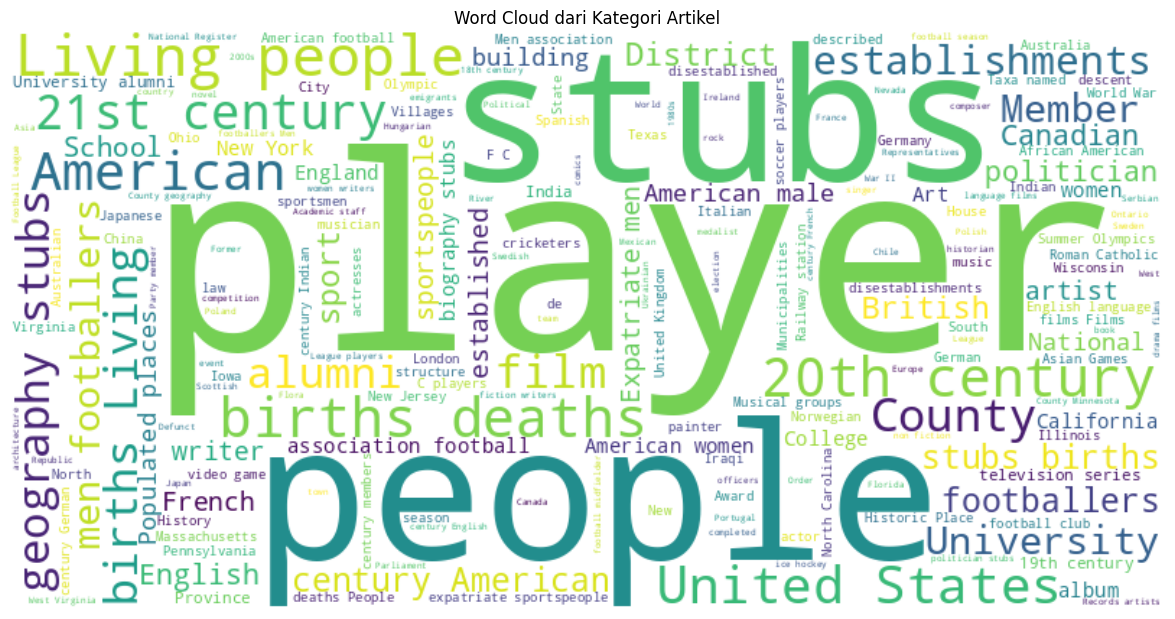

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

def generate_word_cloud_from_categories(file_paths):
    """
    Generate word cloud dari kategori artikel dalam semua file.
    Args:
        file_paths (list): Daftar path file.
    """
    all_categories = []  # Untuk menyimpan semua kategori dari semua file

    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                # Parsing HTML menggunakan BeautifulSoup
                soup = BeautifulSoup(file.read(), 'html.parser')

                # Mengidentifikasi kategori artikel
                categories = identify_article_category(str(soup))

                # Menambahkan kategori ke dalam list
                if categories:
                    all_categories.extend(categories)
        except Exception as e:
            print(f"Gagal memproses {file_path}: {e}")

    # Gabungkan semua kategori menjadi satu string besar
    all_categories_text = " ".join(all_categories)

    # Generate word cloud dari kategori
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories_text)

    # Tampilkan word cloud
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud dari Kategori Artikel")
    plt.show()

# Fungsi untuk mengidentifikasi kategori artikel
def identify_article_category(html_content):
    """
    Mengidentifikasi kategori artikel dari konten HTML.
    Args:
        html_content (str): Konten HTML halaman Wikipedia.
    Returns:
        list: Daftar kategori artikel.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    categories = []
    category_div = soup.find('div', {'id': 'mw-normal-catlinks'})
    if category_div:
        for category in category_div.find_all('a')[1:]:
            categories.append(category.text.strip())
    return categories

# Penggunaan
file_paths = [
    os.path.join(dataset_path, f)
    for f in os.listdir(dataset_path)
    if os.path.isfile(os.path.join(dataset_path, f))
]

generate_word_cloud_from_categories(file_paths)

## Klasifikasi dan Visualisasi Kategori Artikel dari File HTML

### **Judul: Klasifikasi dan Visualisasi Kategori Artikel dari File HTML**

### **Penjelasan Singkat:**
Kode ini bertujuan untuk mengklasifikasikan artikel berdasarkan kategori (seperti Science, History, atau Technology) dan menampilkan distribusi topik dalam bentuk grafik batang. Program membaca file-file HTML, mengidentifikasi kategori artikel menggunakan konten HTML, memeriksa kecocokan dengan kata kunci tertentu, dan menghasilkan visualisasi distribusi kategori.

---
1. **Mengidentifikasi Kategori Artikel:**  
   Fungsi `identify_article_category` mengekstrak daftar kategori dari konten HTML halaman Wikipedia. Kategori biasanya terdapat di bagian bawah halaman dan diambil dari elemen `<div>` dengan ID `mw-normal-catlinks`.

2. **Mengklasifikasikan Artikel:**  
   Fungsi `classify_article` memeriksa apakah kategori artikel cocok dengan salah satu kata kunci yang telah ditentukan (misalnya "science", "history", "technology"). Jika ada kecocokan, artikel diklasifikasikan ke dalam kategori tersebut.

3. **Memproses Semua File:**  
   Program membaca semua file HTML dalam folder dataset, mengidentifikasi kategori setiap artikel, dan mengklasifikasikannya ke dalam salah satu kategori utama (Science, History, Technology).

4. **Menghitung Distribusi Kategori:**  
   Program menghitung jumlah artikel untuk setiap kategori menggunakan `Counter` dan menyimpan hasilnya.

5. **Menampilkan Grafik Distribusi:**  
   Fungsi `plot_category_distribution` membuat grafik batang untuk menampilkan distribusi artikel berdasarkan kategori. Grafik ini memberikan gambaran visual tentang seberapa banyak artikel termasuk dalam setiap kategori.

6. **Penanganan Kesalahan:**  
   Jika folder dataset tidak ditemukan atau tidak ada file dalam folder, program akan memberikan pesan kesalahan. Jika ada file yang gagal diproses, program akan melanjutkan proses tanpa menghentikan keseluruhan eksekusi.

---

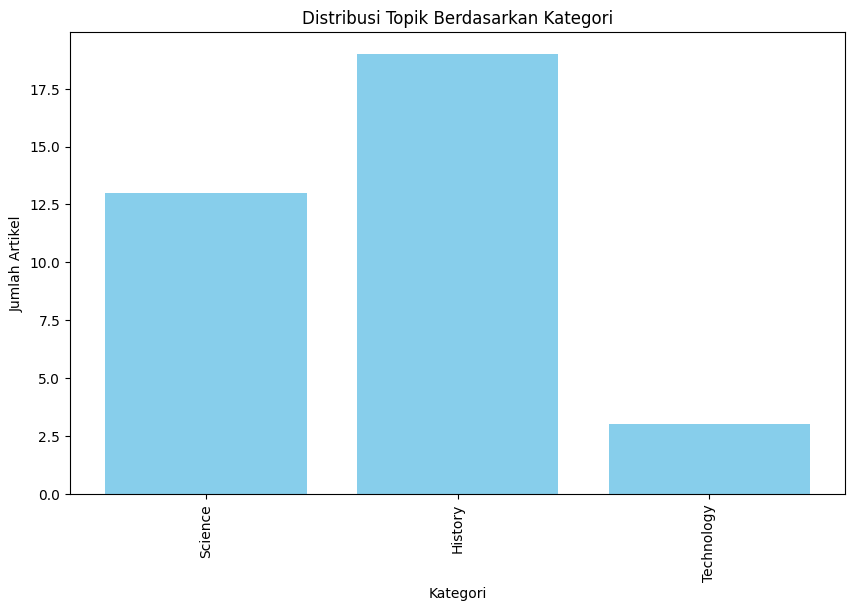

In [17]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Fungsi untuk mengidentifikasi kategori artikel
def identify_article_category(html_content):
    """
    Mengidentifikasi kategori artikel dari konten HTML.
    Args:
        html_content (str): Konten HTML halaman Wikipedia.
    Returns:
        list: Daftar kategori artikel.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    categories = []
    category_div = soup.find('div', {'id': 'mw-normal-catlinks'})
    if category_div:
        for category in category_div.find_all('a')[1:]:
            categories.append(category.text.strip())
    return categories

# Fungsi untuk mengklasifikasikan artikel ke dalam kategori Science, History, atau Technology
def classify_article(categories, keywords_by_category):
    """
    Mengklasifikasikan artikel ke dalam kategori tertentu berdasarkan kata kunci.
    Args:
        categories (list): Daftar kategori artikel.
        keywords_by_category (dict): Dictionary dengan kategori sebagai kunci dan daftar kata kunci sebagai nilai.
    Returns:
        str: Kategori artikel (Science, History, Technology) atau None jika tidak cocok.
    """
    for category, keywords in keywords_by_category.items():
        for keyword in keywords:
            if any(keyword.lower() in cat.lower() for cat in categories):
                return category
    return None

# Fungsi untuk memplot distribusi kategori
def plot_category_distribution(categories):
    """
    Plot distribusi topik berdasarkan kategori.
    Args:
        categories (list): Daftar kategori artikel.
    """
    category_count = Counter(categories)
    categories, counts = zip(*category_count.items())
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel("Kategori")
    plt.ylabel("Jumlah Artikel")
    plt.title("Distribusi Topik Berdasarkan Kategori")
    plt.xticks(rotation=90)
    plt.show()

# Kata kunci untuk setiap kategori (disederhanakan)
keywords_by_category = {
    "Science": ["science"],
    "History": ["history"],
    "Technology": ["technology"]
}

# Memastikan folder dataset ada
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Folder tidak ditemukan: {dataset_path}")

# Mendapatkan daftar nama file dalam folder dataset
file_names = [
    os.path.join(dataset_path, fn)
    for fn in os.listdir(dataset_path)
    if os.path.isfile(os.path.join(dataset_path, fn))
]

# Jika tidak ada file yang ditemukan
if not file_names:
    raise ValueError("Tidak ada file dalam folder dataset.")

# Mengklasifikasikan artikel dan menghitung distribusi kategori
classified_categories = []
for file_name in file_names:
    try:
        with open(file_name, "r", encoding="utf-8") as f:
            html_content = f.read()
            categories = identify_article_category(html_content)
            classified_category = classify_article(categories, keywords_by_category)
            if classified_category:
                classified_categories.append(classified_category)
    except Exception as e:
        print(f"Gagal membaca file '{file_name}': {e}")

# Menampilkan grafik distribusi kategori
plot_category_distribution(classified_categories)

# Kesimpulan

Project ini bertujuan untuk menganalisis pages Wikipedia dengan berbagai cara, termasuk mengunduh artikel acak, mencari kata kunci, menghitung frekuensi kata, mengidentifikasi kategori artikel, hingga membuat visualisasi seperti Word Cloud dan grafik distribusi topik. Berikut adalah ringkasan hasil dari setiap bagian kode beserta penjelasannya:

---

### **1. Mengunduh Artikel Acak Wikipedia**
- **Output:** Program berhasil mengunduh 1000 artikel Wikipedia secara acak dan menyimpannya dalam folder `wiki`. Setiap artikel divalidasi untuk memastikan bahwa halaman tersebut adalah artikel utama (bukan halaman khusus seperti "Special:").
- **Penjelasan Singkat:** Artikel diunduh menggunakan URL `https://en.wikipedia.org/wiki/Special:Random`, dan setiap artikel disimpan dalam format `.html` dengan nama file yang dibersihkan dari karakter ilegal.

---

### **2. Menghitung Jumlah File dalam Folder Dataset**
- **Output:** Menampilkan jumlah total file yang tersimpan di folder `wiki`.
- **Penjelasan Singkat:** Ini adalah langkah sederhana untuk memastikan bahwa semua artikel yang diunduh telah disimpan dengan benar.

---

### **3. Membaca dan Menampilkan Konten File Pertama**
- **Output:** Menampilkan seluruh konten dari file pertama dalam folder `wiki`.
- **Penjelasan Singkat:** Bagian ini membantu pengguna memahami struktur HTML dari artikel Wikipedia yang diunduh. Ini juga berguna untuk debugging atau analisis awal.

---

### **4. Pencarian Paralel Kata Kunci (`data`)**
- **Output:** Menunjukkan daftar file dan nomor baris di mana kata kunci `"data"` ditemukan.
- **Penjelasan Singkat:** Program menggunakan pendekatan **MapReduce** dan **pemrosesan paralel** untuk mencari kemunculan kata `"data"` di semua file. Hasilnya menunjukkan lokasi spesifik (file dan baris) di mana kata tersebut muncul.

---

### **5. Pencarian Case-Insensitive**
- **Output:** Mirip dengan pencarian sebelumnya, tetapi tidak membedakan huruf besar/kecil (case-insensitive).
- **Penjelasan Singkat:** Dengan pendekatan case-insensitive, program dapat menemukan lebih banyak kemunculan kata `"data"`, karena tidak terbatas pada format tertentu.

---

### **6. Membandingkan Hasil Pencarian Baru dan Lama**
- **Output:** Menunjukkan file baru atau tambahan kemunculan kata `"data"` yang tidak ada di hasil pencarian sebelumnya.
- **Penjelasan Singkat:** Ini membantu pengguna melacak perubahan atau informasi baru yang mungkin relevan dalam dataset.

---

### **7. Mencari Indeks Kemunculan Substring**
- **Output:** Menampilkan indeks awal setiap kemunculan substring `"data"` dalam sebuah string.
- **Penjelasan Singkat:** Fungsi ini berguna untuk analisis teks mendetail, seperti menemukan lokasi spesifik kata dalam dokumen.

---

### **8. Ekstraksi Kemunculan Kata dengan Konteks**
- **Output:** Menyimpan hasil pencarian ke dalam file CSV, mencakup nama file, nomor baris, indeks karakter, dan konteks sekitar kata.
- **Penjelasan Singkat:** Informasi ini membantu pengguna memahami konteks di mana kata tertentu digunakan dalam kalimat atau paragraf.

---

### **9. Menghitung Frekuensi Kata Kunci**
- **Output:** Menampilkan frekuensi kemunculan kata kunci seperti `"science"` dan `"history"` di semua file.
- **Penjelasan Singkat:** Ini memberikan gambaran tentang seberapa sering topik tertentu dibahas dalam dataset Wikipedia.

---

### **10. Mengidentifikasi Kategori Artikel**
- **Output:** Menampilkan daftar kategori artikel dari file pertama.
- **Penjelasan Singkat:** Kategori artikel biasanya terdapat di bagian bawah halaman Wikipedia dan mencerminkan topik atau tema artikel tersebut.

---

### **11. Membuat Word Cloud**
- **Output:** Menampilkan Word Cloud yang menunjukkan kata-kata Kategori Artikel Wikipedia paling sering muncul dalam dataset.
- **Penjelasan Singkat:** Word Cloud adalah representasi visual yang membantu pengguna melihat kata-kata Kategori Artikel Wikipedia dominan dalam dataset. Semakin besar ukuran kata, semakin sering kata tersebut muncul.

---

### **12. Klasifikasi dan Visualisasi Kategori Artikel**
- **Output:** Menampilkan grafik batang yang menunjukkan distribusi artikel berdasarkan kategori seperti Science, History, dan Technology.
- **Penjelasan Singkat:** Artikel diklasifikasikan berdasarkan kata kunci dalam kategori mereka. Grafik ini memberikan gambaran visual tentang seberapa banyak artikel termasuk dalam setiap kategori.

---

### **Manfaat:**
- **Eksplorasi Data:** Pengguna dapat menjelajahi dataset Wikipedia untuk menemukan informasi yang relevan.
- **Analisis Teks:** Alat ini membantu dalam analisis teks besar, seperti mengidentifikasi pola penggunaan kata atau hubungan antara dokumen.
- **Visualisasi:** Representasi visual seperti Word Cloud dan grafik batang membuat data lebih mudah dipahami.